# **Telecom Customer Retention Project  
### Will Byrd, May 2024  
  
## Intrduction**

This is a standard classification project.  In this notebook, I will create classification models to predict wether or not a telephone service customer churned.  Churn refers to customers who have canceled their subscriptions.  I will focus on 2 different models-**Decision Tree Classifier and Logistic Regression.**  A baseline of each model will be created and then iteratively improved upon until the best model is created.  Methods to improve upon these models include   
-  feature scaling
-  Oversampling(SMOTE)  
-  Pruning the Decision Tree  
-  Hyper Parameter Tuning  




## **Data**

The data used in this project is from Kaggle's Churn in Telecom's Dataset.  This data is remarkably clean with no missing values and will allow me to focus on the principles of model building.  Each record in this dataset represents a customer in Telecom and has attributes such as: 
-  state  
-  length of subscription  
-  type of plan  
-  usage  
-  wether or not the churned  
  
We will be targeting churn values for customers.  The churn column is our target column-otherwise known as our dependent variable.  Accureately predicted customers who Churn will have values of True Positive and accurately predicted customers who do not Churn will have values of True Negative.
  
There will be a few preprocessing techniques on display here.  We will notice some 1:1 correlations between our usage columns that will allow us to drop specific columns to simpilify the data.  We will also dummy code categorical variables such as International Plan and Voicemail Plan.  Our state column will make building our models impossible, so we will use One Hot Encoding as well.   

## Goals

The main goal is to build the best model that can predict wether or not a customer will Churn.  We want to be able to determine qualities in customers who will churn vs those who will not churn so the business can be more strategic and efficient.  This can help the business allocate resources either to markets that are more advantageous or to know how to better anticipate their budget.  If a company can precisely predict how many customers will churn every month, they can be better prepared for the future.

Since we have an overwhelming majority of False values for Churn, we want to build a model that can most correctly predict true positives as this will give us confidence in knowing how much money (subscriptions) the company will lose month over month. 

## Overview

We will explore the data to better understand all features, correlations, and some distributions.  Then build a baseline Decision Tree Model and refine it with the methods mentioned above.  Every iteration of out baseline model will be evaluated with a cross validation score and Area Under the Curve (AUC) and then finally a confusion matrix will validate which model is the best.  Then the process will start over again with a Logistic Regression Model.

## **Explaratory Data Analysis**  

Let's load in every library we can think of.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
#from seaborn import load_dataset
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
#from sklearn.utils.class_weight import compute_class_weight
#from imblearn.over_sampling import RandomOverSampler
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

Let's take a look at the data to get an understanding of the features.

In [2]:
# using pandas to read in data
df = pd.read_csv ('Data/telecom.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


We can see the State column will need to be one hot encoded.  The International Plan and Voice Mail Plan columns will need to be dummy coded.  And we can probebly drop some columns that will not impact our results.

Let's clean this up and check for any missing values.

In [3]:
df.columns = df.columns.str.replace(' ', '_')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

Great, no Null values.  Let's take a look at all values in all columns to get a better understanding.

In [5]:
#for col in df.columns:
#    print(f"{col} vals: {df[col].unique()} \n")

Everything looks normal so far, except the area codes.  Only 3 area codes makes me think that column is not going to be usable.  We can also assume phone number has no bearing on wether a customer churns.  We have a few categorical variables we can dummy code:

- intl plan  
- voicemail plan  



In [6]:
df.replace({'no': 0, 'yes':1, 'false':0, 'true':1}, inplace=True)
df.head()


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df.drop('phone_number', axis = 1, inplace = True)

In [8]:
df.drop('area_code', axis = 1, inplace = True)

I'm thinking minutes, charges, and calls are all related.  Let's take a deeper dive into this and figure it out.

In [9]:
mins_calls_charge = df[['total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']]
mins_calls_charge.head()

,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [10]:
mins_calls_charge.corr()

,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
total_day_minutes,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092
total_day_calls,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666
total_day_charge,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094
total_eve_minutes,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067
total_eve_calls,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674
total_eve_charge,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074
total_night_minutes,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180
total_night_calls,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630
total_night_charge,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186
total_intl_minutes,-0.010155,0.021565,-0.010157,-0.011035,0.008703,-0.011043,-0.015207,-0.013605,-0.015214,1.000000,0.032304,0.999993


OK cool.   We have direct 1:1 correlations be minutes and charges.  For that reason, we can drop the minutes columns.

In [11]:
df.drop('total_day_minutes', axis = 1, inplace = True)

In [12]:
df.drop('total_eve_minutes', axis = 1, inplace = True)

In [13]:
df.drop('total_night_minutes', axis = 1, inplace = True)

In [14]:
df.drop('total_intl_minutes', axis = 1, inplace = True)

In [15]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,OH,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,OK,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False


In [16]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Let's establish our X and Y variables. This will allow us to build our test and train sets for modeling.  

Our X values are independent variables.  In this dataset that includes all values except Churn.

In [17]:
X = df.drop('churn', axis =1)
y = df.churn

Now that our X and Y values are established, we can prepare our training sets for modeling.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### One Hot Encoding
Let's one hot encode our state column so we can build our models.  This is always good practice for categorical variables that aren't binary.  This will create extra columns and we will ahve to drop our original State column as a result.

In [19]:
# instantiate ohe object
ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")

# fit ohe on small train data
ohe.fit(X_train[['state']])

# access the column names of the states
col_names = ohe.categories_[0]

# make a df with encoded states
train_state_encoded = pd.DataFrame(ohe.transform(X_train[["state"]]), 
                               index = X_train.index, 
                               columns = col_names)

# combine encoded states with X_t and drop old 'state' column
X_train = pd.concat([X_train.drop("state", axis = 1), train_state_encoded], axis = 1)

In [20]:
X_train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
367,45,0,0,0,127,13.29,108,21.54,100,11.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3103,115,0,0,0,111,33.30,108,19.30,113,14.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,121,0,1,31,63,40.31,117,17.48,85,8.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2531,180,0,0,0,134,24.36,113,15.34,87,8.29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2378,112,0,0,0,122,35.05,94,13.98,101,6.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's inspect our training set below.  This is a portion of our original df, so expect it to be slightly smaller than the original.

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 367 to 3174
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          2499 non-null   int64  
 1   international_plan      2499 non-null   int64  
 2   voice_mail_plan         2499 non-null   int64  
 3   number_vmail_messages   2499 non-null   int64  
 4   total_day_calls         2499 non-null   int64  
 5   total_day_charge        2499 non-null   float64
 6   total_eve_calls         2499 non-null   int64  
 7   total_eve_charge        2499 non-null   float64
 8   total_night_calls       2499 non-null   int64  
 9   total_night_charge      2499 non-null   float64
 10  total_intl_calls        2499 non-null   int64  
 11  total_intl_charge       2499 non-null   float64
 12  customer_service_calls  2499 non-null   int64  
 13  AK                      2499 non-null   float64
 14  AL                      2499 non-null 

Ok, our data is cleaned up and split into test and train sets.  We can begin to build some models.  First, I want some more info on our categorical features.

In [22]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [23]:
df.churn.value_counts()/len(df.churn)

False    0.855086
True     0.144914
Name: churn, dtype: float64

<15% of customers churn.  This is actually industry standard, so all good. here.

In [24]:
df.international_plan.value_counts()

0    3010
1     323
Name: international_plan, dtype: int64

In [25]:
df.international_plan.value_counts()/len(df.international_plan)

0    0.90309
1    0.09691
Name: international_plan, dtype: float64

<10% of customers have international plans.

In [26]:
df.voice_mail_plan.value_counts()/len(df.voice_mail_plan)

0    0.723372
1    0.276628
Name: voice_mail_plan, dtype: float64

<30% have voice mail plans.

### Baseline Decision Tree Model

Let's build our baseline model.  All subsequent decision tree models will be evaluated against this baseline.

In [27]:
# One-hot encode categorical features
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

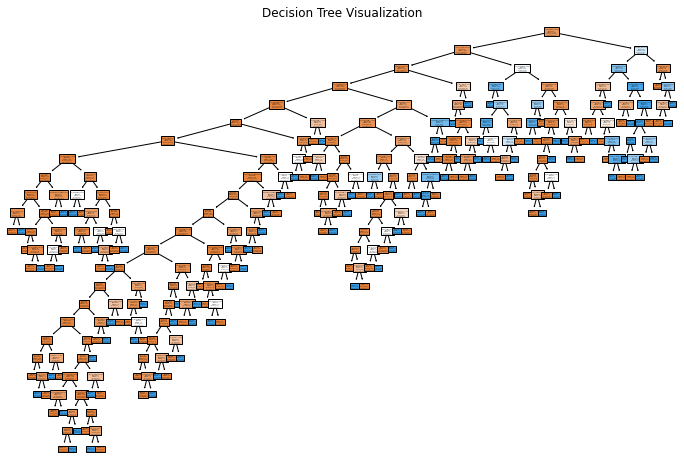

In [28]:
# Initialize and fit the decision tree classifier with the encoded data
decision_tree_model = DecisionTreeClassifier().fit(X_train_encoded, y_train)

# Predict the labels for the test set
y_pred_dt = decision_tree_model.predict(X_test_encoded)

# Now, you can proceed with plotting the decision tree or any other analysis
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, filled=True, feature_names=X_train_encoded.columns, class_names=['Not Churn', 'Churn'])
plt.title("Decision Tree Visualization")
plt.show()



In [29]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_rep_dt)


Decision Tree Model Evaluation:
Accuracy: 0.9112709832134293
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.94      0.95       709
        True       0.69      0.74      0.71       125

    accuracy                           0.91       834
   macro avg       0.82      0.84      0.83       834
weighted avg       0.91      0.91      0.91       834



This is actually a realy strong baseline model.  However, we want to make sure we are focusing on the right metrics, so we will add a cross validation score and AUC score as well.

To add more here:  
**Precision** is the number of True Positives/all predicted positives or the True Positive Rate (TPR). So Precision in this case is how often the model correctly predicts the target class. 
  
**Recall** is the number of True Positives/actual positives.  In this case, Recall is the models ability to find all objects of the target class.
  

### Cross Validation
Cross Validation is a technique used to partition a dataset into multiple subsets for training.  This will help detect overfitting and give us more confidence in our model.

In [30]:
cv_scores = cross_val_score(decision_tree_model, X_test_encoded, y_test, cv=5)
print('Cross-Validation Scores', cv_scores)
print('Mean CV Score', cv_scores.mean())

Cross-Validation Scores [0.91017964 0.92215569 0.89221557 0.91017964 0.87349398]
Mean CV Score 0.9016449029651541


### Area Under the Curve  

AUC measures the overall performance of our binary classification model.  We can see our True Positive Rate (TPR) on the Y-axis and our False Positive Rate (FPR) on the X-axis.  These values range from 0 to 1. 

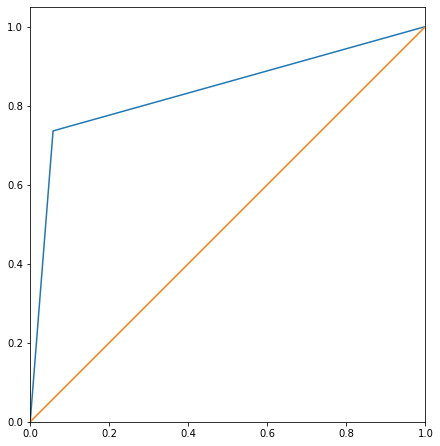

0.839086036671368


In [31]:
# Your existing code to get the probability scores and calculate ROC curve
y_prob_encoded = decision_tree_model.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_encoded)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)



In [32]:
print(y_test)

438     False
2674    False
1345     True
1957    False
2148    False
        ...  
3257    False
1586    False
3068    False
2484    False
219     False
Name: churn, Length: 834, dtype: bool


We have made our baseline model and evaluated it on a variety of metrics.  now let's take a quick look at Feature importance.  This will help us understand which features (independent variables) are impacting our dependent variable the most.

<span style="font-size: 30px;">**Feature Importance**</span>  

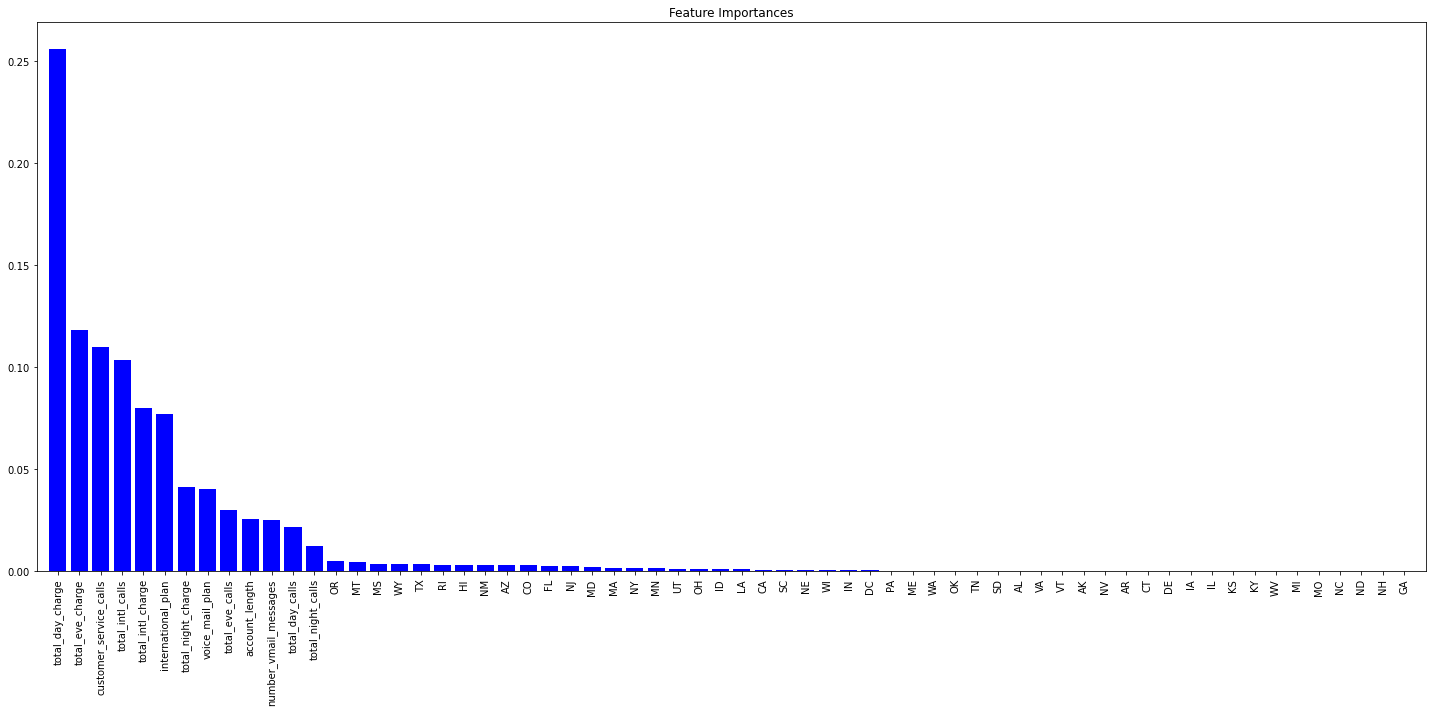

In [33]:
 X_train_final= pd.DataFrame(X_train_encoded,columns=X_train.columns)

feature_importances = decision_tree_model.feature_importances_

feature_names = X_train_final.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(20, 10))
plt.title("Feature Importances")
plt.bar(range(X_train_final.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X_train_final.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_final.shape[1]])
plt.tight_layout()
plt.show()

Lots of unimportant features.  Lets reduce this list down to the top 15, since most of the states don't carry much weght here.

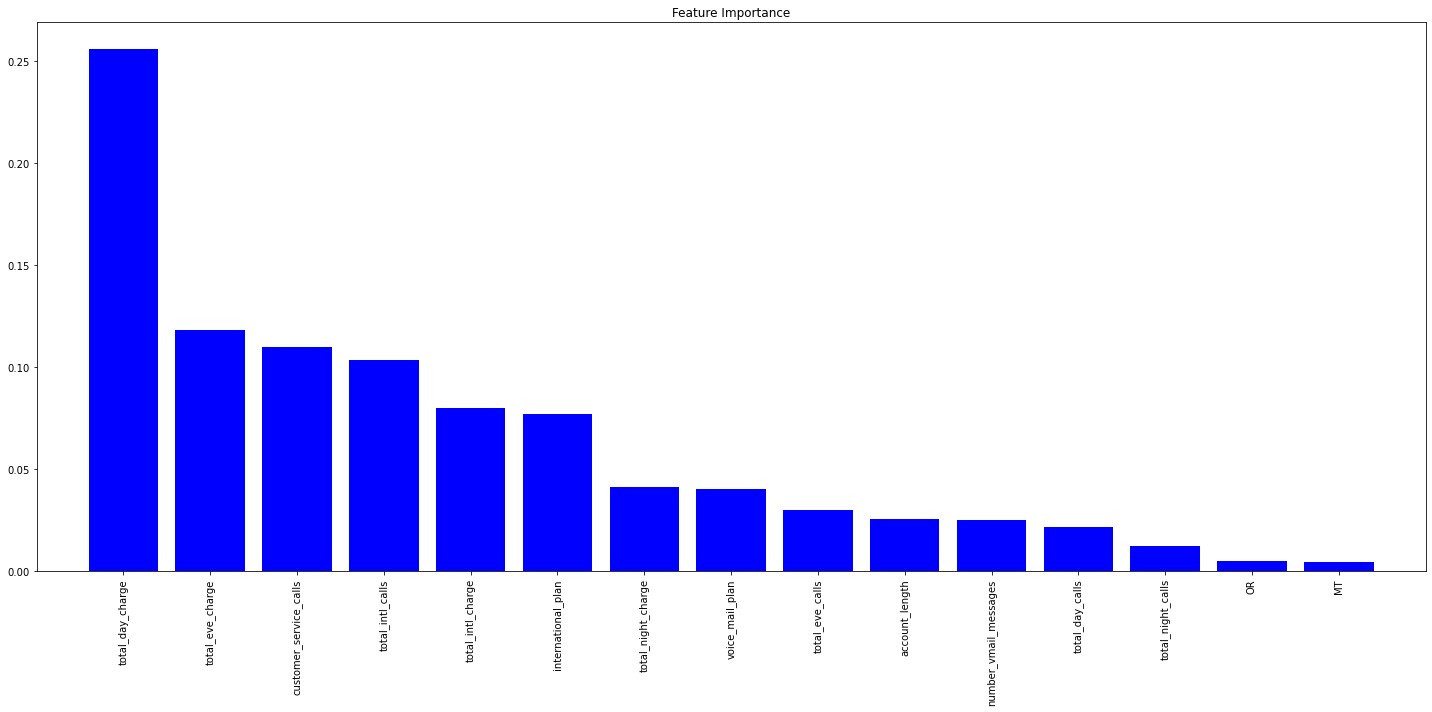

In [34]:
 X_train_final= pd.DataFrame(X_train_encoded,columns=X_train.columns)

feature_importances = decision_tree_model.feature_importances_

feature_names = X_train_final.columns
indices = np.argsort(feature_importances)[::-1][:15]

plt.figure(figsize=(20, 10))
plt.title("Feature Importance")
plt.bar(range(15), feature_importances[indices], color="b", align="center")
plt.xticks(range(15), feature_names[indices], rotation=90)
plt.xlim([-1, 15])
plt.tight_layout()
plt.show()

We can see that the most impactful features are:
- total_day_charge  
- total_eve_charge  
- customer_service_calls 

In [35]:
df.corr().churn.sort_values(ascending=False)

churn                     1.000000
international_plan        0.259852
customer_service_calls    0.208750
total_day_charge          0.205151
total_eve_charge          0.092786
total_intl_charge         0.068259
total_night_charge        0.035496
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
voice_mail_plan          -0.102148
Name: churn, dtype: float64

hmm, this is slightly different than what we are seeing above.  However, we can deal with this later.

Let's take a look at the <span style="font-size: 15px;">**Categorical Features**</span> above and check the ratios.  
1st up is the International Plan.


In [36]:
int_plan_churn = pd.DataFrame(df.groupby(['international_plan'])['churn'].mean())
int_plan_churn

,churn
international_plan,
0,0.114950
1,0.424149


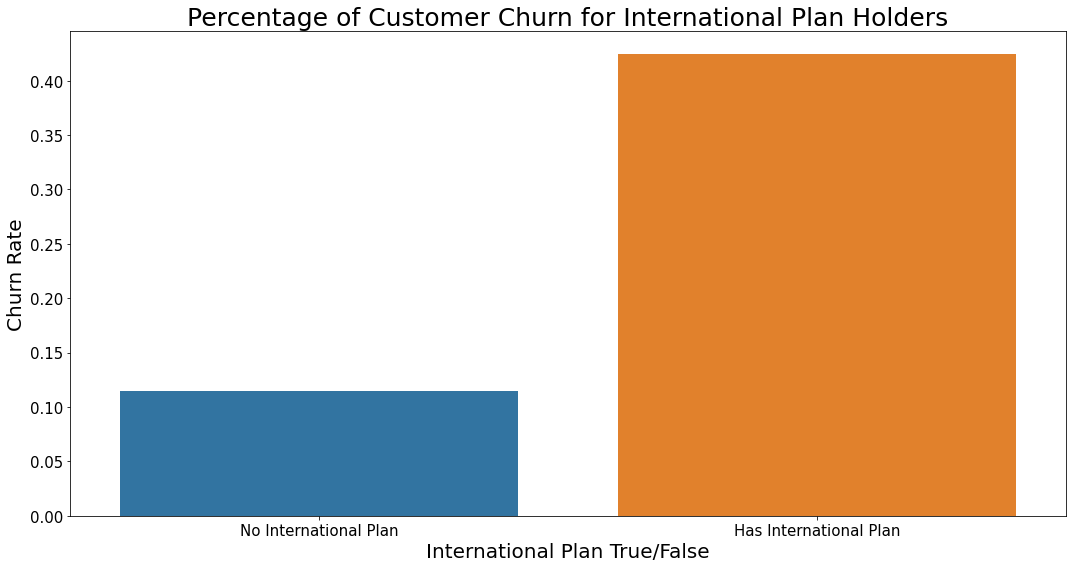

In [37]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1], y = 'churn', data = int_plan_churn, ax = ax)
plt.title('Percentage of Customer Churn for International Plan Holders', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('International Plan True/False', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
ax.set_xticklabels(['No International Plan', 'Has International Plan'])
plt.tight_layout()


OK! we can see that customers who have international plans churn at a much higher rate than customers who don't.  Maybe they are unhappy with their monthly bill?  Maybe taking a look at customer service calls could shed some light on this.  I would assume customers who make more customer service calls are probably not happy customers and therefore churning.    
  
    
Let's take a look at the values for <span style="font-size: 15px;">**Customer Service Calls**</span> next.

In [38]:
df['customer_service_calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer_service_calls, dtype: int64

Most customers aren't making that many customer service calls.  I'm assuming everyone makes one setting up their phone plan.  Let's look for some <span style="font-size: 15px;">**Correlations**</span>.

In [39]:
csc = pd.DataFrame(df.groupby(['customer_service_calls'])['churn'].mean())
csc

,churn
customer_service_calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


As we suspected, customers who make more customer service calls tend to churn at higher rates.    
Maybe the company needs to look into better customer service.  
  
  
Let's take a look at the Distribution of <span style="font-size: 15px;">**Total Day Charge**</span>.    

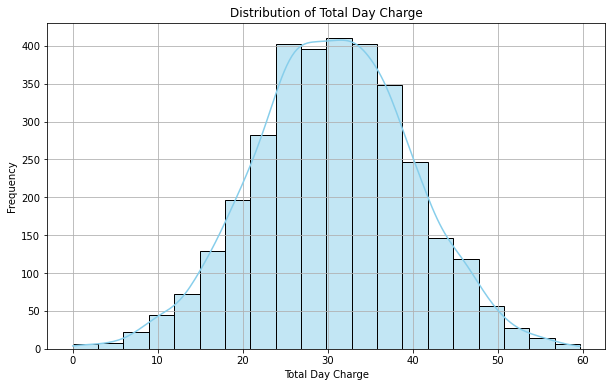

In [40]:
total_day_charge_values = df['total_day_charge']
plt.figure(figsize=(10, 6))
sns.histplot(total_day_charge_values, bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Total Day Charge')
plt.xlabel('Total Day Charge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

It's a **normal distribution.**  I'm going to find the mean of 'total_day_charge' to see if there is a threshold for customers who churn once the spend a certain amount.

In [41]:
tdc = pd.DataFrame(df.groupby(['total_day_charge'])['churn'].mean())
tdc

,churn
total_day_charge,
0.00,0.5
0.44,0.0
1.33,0.0
1.34,0.0
2.13,0.0
...,...
57.04,1.0
57.36,1.0
58.70,1.0


In [42]:
# Assuming 'total_day_charge' is a column in your DataFrame df
total_day_charge_range = df['total_day_charge'].describe()

print("Range of 'total_day_charge' column:")
print("Minimum:", total_day_charge_range['min'])
print("Maximum:", total_day_charge_range['max'])


Range of 'total_day_charge' column:
Minimum: 0.0
Maximum: 59.64


We can see the max 'total_day_charge value is $59.64/day.  And we can see that as customers get close to that value, they have a 100% churn rate.

### **Improving The Baseline Model**

We have done some evaluation of our categorical features and determined the following customers are **likely to churn**:

-  customers who make multiple customer service calls   
-  customers who have a high daily bill  
-  customers who have an international plan

We can see that the same will be true for customers with high eve and night charges as well.

Now let's try to improve upon our baseline model.  We can do the following to improve upon our baseline model:

-  Feature Scaling
-  Under/Over sampling
-  Hyper Parameter Tuning

After we have improved this model, we will build a logistic regression model as well.



I'll move our Decision Tree Classifier back down here for reference:

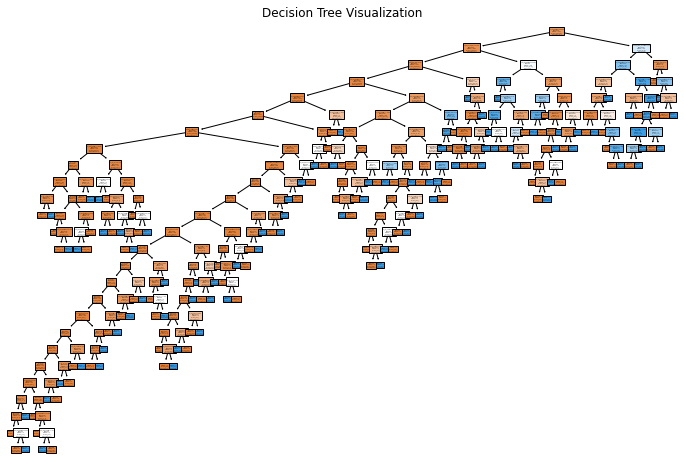

Decision Tree Model Evaluation:
Accuracy: 0.9136690647482014
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.94      0.95       709
        True       0.70      0.75      0.72       125

    accuracy                           0.91       834
   macro avg       0.83      0.85      0.84       834
weighted avg       0.92      0.91      0.92       834



In [43]:
# Initialize and fit the decision tree classifier with the encoded data
decision_tree_model = DecisionTreeClassifier().fit(X_train_encoded, y_train)

# Predict the labels for the test set
y_pred_dt = decision_tree_model.predict(X_test_encoded)

# Now, you can proceed with plotting the decision tree or any other analysis
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, filled=True, feature_names=X_train_encoded.columns, class_names=['Not Churn', 'Churn'])
plt.title("Decision Tree Visualization")
plt.show()
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_rep_dt)

In [44]:
cv_scores = cross_val_score(decision_tree_model, X_test_encoded, y_test, cv=5)
print('Cross-Validation Scores', cv_scores)
print('Mean CV Score', cv_scores.mean())

Cross-Validation Scores [0.90419162 0.91616766 0.89221557 0.90419162 0.87349398]
Mean CV Score 0.8980520885938967


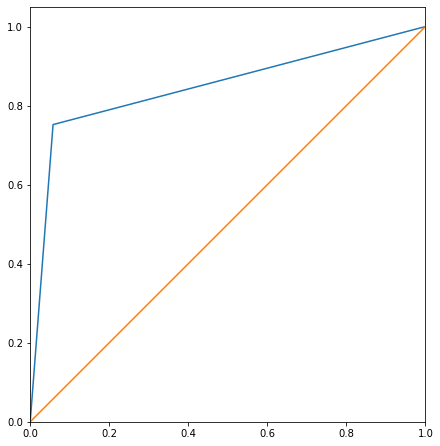

0.8470860366713682


In [45]:
# Your existing code to get the probability scores and calculate ROC curve
y_prob_encoded = decision_tree_model.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_encoded)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)


To reiterate, our baseline model has the following scores:
  
-  Accuracy = 91.9%
-  Precision = 73% (we are focused on true Positives)
-  Cross Validation = 90%
-  AUC = 84%

### **Feature Scaling**

Feature scaling will normalize the range of all continous variables between -1 and 1.  This will ultimately reduce the value of extreme values in our dataset.

In [46]:
standard = StandardScaler()
X_train_final = standard.fit_transform(X_train_encoded)

In [47]:
X_test_final = standard.transform(X_test_encoded)

In [48]:
X_train_final

array([[-1.4045081 , -0.32744767, -0.61141784, ..., -0.16341668,
        -0.17589939, -0.15550025],
       [ 0.36638814, -0.32744767, -0.61141784, ..., -0.16341668,
        -0.17589939, -0.15550025],
       [ 0.51817924, -0.32744767,  1.63554272, ..., -0.16341668,
        -0.17589939, -0.15550025],
       ...,
       [-0.87323923, -0.32744767, -0.61141784, ..., -0.16341668,
        -0.17589939, -0.15550025],
       [ 1.73250809, -0.32744767, -0.61141784, ..., -0.16341668,
        -0.17589939, -0.15550025],
       [-1.63219476, -0.32744767,  1.63554272, ..., -0.16341668,
        -0.17589939, -0.15550025]])

In [49]:
my_df1 = pd.DataFrame(X_train_final)
my_df1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-1.404508,-0.327448,-0.611418,-0.584700,1.330852,-1.884170,0.401340,1.037905,0.004940,1.071757,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555
1,0.366388,-0.327448,-0.611418,-0.584700,0.529165,0.293703,0.401340,0.517286,0.670832,2.212569,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555
2,0.518179,-0.327448,1.635543,1.685101,-1.875896,1.056666,0.849774,0.094283,-0.763398,-0.077797,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555
3,2.010792,-0.327448,-0.611418,-0.584700,1.681590,-0.679320,0.650470,-0.403094,-0.660953,-0.322569,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555
4,0.290493,-0.327448,-0.611418,-0.584700,1.080325,0.484172,-0.296224,-0.719184,0.056162,-1.188013,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0.138701,-0.327448,-0.611418,-0.584700,0.980114,1.746707,-0.894137,-0.045169,-1.941515,-0.781516,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555
2495,0.543478,-0.327448,-0.611418,-0.584700,-1.926002,-2.680873,-0.545355,-0.396122,-2.146405,1.001822,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555
2496,-0.873239,-0.327448,-0.611418,-0.584700,-1.224526,-1.710027,0.550818,1.207571,1.285502,-0.313827,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555
2497,1.732508,-0.327448,-0.611418,-0.584700,0.529165,-0.015400,1.497512,-0.507683,-0.404840,0.551617,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555


In [50]:
my_df1_copy = my_df1.copy()

In [51]:
my_df2 = pd.DataFrame(X_test_final)
my_df2

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.315791,-0.327448,-0.611418,-0.584700,-0.372733,-0.462730,0.301688,2.562574,1.183057,-0.222038,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,6.430858
1,-0.847941,-0.327448,-0.611418,-0.584700,0.829797,-1.311676,1.198556,0.326702,2.105062,-0.239521,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500
2,-0.063687,-0.327448,-0.611418,-0.584700,-5.032539,-3.330643,1.497512,-0.814476,-0.609730,-0.659130,...,7.145803,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500
3,1.175941,-0.327448,-0.611418,-0.584700,-1.074209,0.607160,-0.445702,0.064068,0.670832,-0.873306,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500
4,-0.114284,-0.327448,-0.611418,-0.584700,0.078216,-0.666259,-1.342571,0.470802,-0.456063,0.534133,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,6.430858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,1.783105,-0.327448,-0.611418,-0.584700,0.479059,-0.785982,0.451166,-0.054466,1.592837,1.810444,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500
830,-0.291373,-0.327448,-0.611418,-0.584700,-1.174420,-1.807982,-0.993789,-0.665728,-1.531735,-0.117135,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500
831,-0.569657,-0.327448,1.635543,0.952907,-0.773577,-0.359332,-1.043615,0.438263,-0.404840,-1.507090,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500
832,1.024150,-0.327448,1.635543,2.270856,1.330852,-1.168008,-0.595181,1.493446,1.285502,1.757993,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.155500


In [52]:
my_df2_copy = my_df2.copy()

### Feature Scaled Model

As you can see above, all of our continuous variables are now **scaled between -1 and 1**.  This should improve the model.



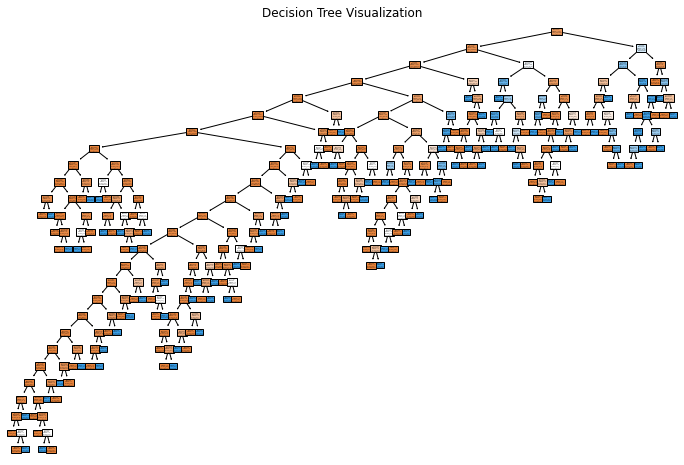

Decision Tree Model Evaluation:
Accuracy: 0.919664268585132
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.95      0.95       709
        True       0.72      0.75      0.74       125

    accuracy                           0.92       834
   macro avg       0.84      0.85      0.84       834
weighted avg       0.92      0.92      0.92       834



In [53]:
# Initialize and fit the decision tree classifier with the encoded data
decision_tree_model_fs = DecisionTreeClassifier().fit(my_df1, y_train)

# Predict the labels for the test set
y_pred_dt_fs = decision_tree_model_fs.predict(my_df2)

# Now, you can proceed with plotting the decision tree or any other analysis
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, filled=True, feature_names=my_df1.columns, class_names=['Not Churn', 'Churn'])
plt.title("Decision Tree Visualization")
plt.show()
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt_fs)
classification_rep_dt = classification_report(y_test, y_pred_dt_fs)

print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_rep_dt)

In [54]:
cv_scores_fs = cross_val_score(decision_tree_model_fs, my_df2_copy, y_test, cv=5)
print('Cross-Validation Scores', cv_scores_fs)
print('Mean CV Score', cv_scores_fs.mean())

Cross-Validation Scores [0.89820359 0.92814371 0.88023952 0.91616766 0.87951807]
Mean CV Score 0.9004545126614241


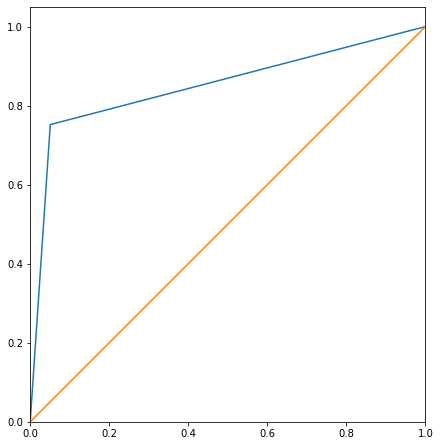

0.8506121297602257


In [55]:
# Your existing code to get the probability scores and calculate ROC curve
y_prob_df2 = decision_tree_model_fs.predict_proba(my_df2_copy)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_df2)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)


To reiterate, our baseline model has the following scores:
  
-  Accuracy = 91.9%
-  Precision = 73% (we are focused on true Positives)
-  Cross Validation = 90%
-  AUC = 84%

The Feature Scaled Mode is not accurate, so let's keep trying.  Here are the scores for reference:
    
Accuracy = 91%  
Precision = 71% (we are focused on true Positives)  
Cross Validation = 89%  
AUC = 85%      

Feature scaling did not necessarily improve our model.  Let's try SMOTE to fix the class imbalance issue.

<span style="font-size: 30px;">**SMOTE**</span>

SMOTE is used for class imbalance.  Specifically, it is used for oversampling the minority class to create a more balanced dataset that should improve model performance.


In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=4)

In [57]:
# Apply SMOTE resampling
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now X_train_resampled and y_train_resampled contain the resampled data


Now we have to refit the training sets so they are the same size.  This will make all model building much easier.

In [58]:
my_df1, my_df2 = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

True     2141
False    2141
Name: churn, dtype: int64

In [59]:
print("Input data shape:", my_df1.shape)
print("Labels shape:", y_train.shape)


Input data shape: (4282, 64)
Labels shape: (2499,)


In [60]:
#print("Input data sample:")
#print(my_df1.head())
#print("Labels sample:")
#print(y_train.head())


In [61]:
print("Input data shape:", X_train_resampled.shape)
print("Labels shape:", y_train_resampled.shape)


Input data shape: (4282, 64)
Labels shape: (4282,)


Ok, our dataset is balanced now. Let's rerun our model.  
  
<span style="font-size: 30px;">**Oversampled (SMOTE) Decision Tree**</span>  

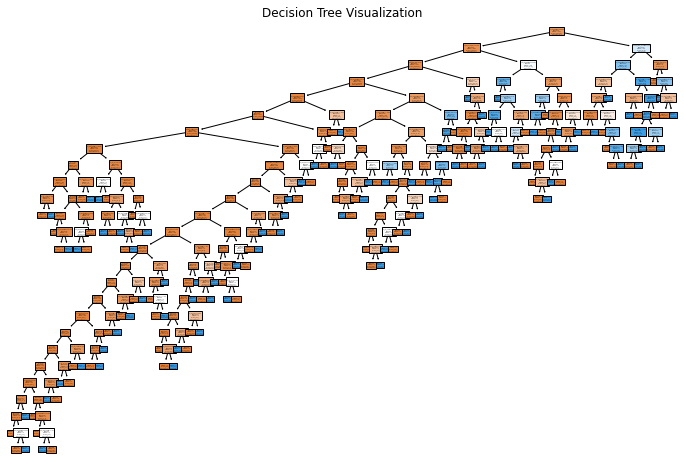

Decision Tree Model Evaluation:
Accuracy: 0.7697841726618705
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.85      0.86       709
        True       0.28      0.34      0.30       125

    accuracy                           0.77       834
   macro avg       0.58      0.59      0.58       834
weighted avg       0.79      0.77      0.78       834



In [62]:
# Initialize and fit the decision tree classifier with the encoded data
decision_tree_model_os = DecisionTreeClassifier().fit(X_train_resampled, y_train_resampled)

# Predict the labels for the test set
y_pred_dt_os = decision_tree_model_os.predict(X_test_final)

# Now, you can proceed with plotting the decision tree or any other analysis
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, filled=True, feature_names=X_train_resampled.columns, class_names=['Not Churn', 'Churn'])
plt.title("Decision Tree Visualization")
plt.show()
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt_os)
classification_rep_dt = classification_report(y_test, y_pred_dt_os)

print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_rep_dt)

In [63]:
cv_scores_os = cross_val_score(decision_tree_model_os, X_test_final, y_test, cv=5)
print('Cross-Validation Scores', cv_scores_os)
print('Mean CV Score', cv_scores_os.mean())

Cross-Validation Scores [0.89221557 0.92814371 0.88622754 0.91616766 0.87951807]
Mean CV Score 0.9004545126614241


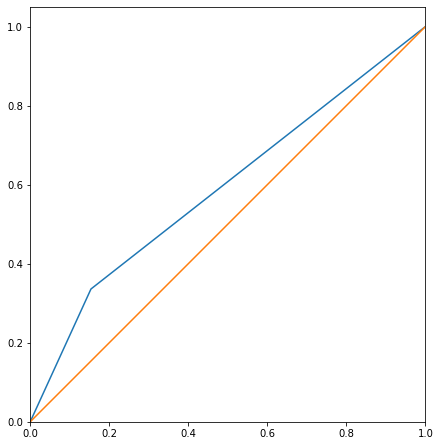

0.5911311706629055


In [64]:
# Your existing code to get the probability scores and calculate ROC curve
y_prob_xfinal = decision_tree_model_os.predict_proba(X_test_final)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xfinal)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)

To reiterate, our baseline model has the following scores:
  
-  Accuracy = 91.9%
-  Precision = 73% (we are focused on true Positives)
-  Cross Validation = 90%
-  AUC = 84%

The Oversampled Scaled Mode is less accurate, so let's keep trying.  Because our model was oversampled by so much, it skewed our precision and therefore affected our Accuracy. Here are the scores for reference:
    
Accuracy = 81%  
Precision = 34% (we are focused on true Positives)  
Cross Validation = 90%  
AUC = 59%     

Wow, ok that hurt our model.  Let's try pruning it to see what happens


Let's do a little pruning of this Decision Tree  
  
<span style="font-size: 30px;">**Pruned Oversampled Decision Tree**</span>    

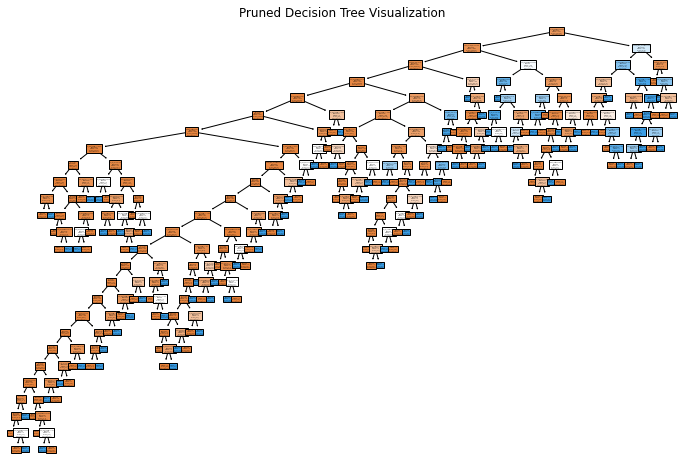

Pruned Decision Tree Model Evaluation:
Accuracy: 0.829736211031175
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.93      0.90       709
        True       0.40      0.26      0.31       125

    accuracy                           0.83       834
   macro avg       0.64      0.59      0.61       834
weighted avg       0.80      0.83      0.81       834



In [65]:
# Initialize the decision tree classifier with the encoded data
decision_tree_model_prune = DecisionTreeClassifier(ccp_alpha=0.005)  # Adjust ccp_alpha as needed

# Fit the decision tree classifier to the resampled training data
decision_tree_model_prune.fit(X_train_resampled, y_train_resampled)

# Predict the labels for the test set
y_pred_dt_prune = decision_tree_model_prune.predict(X_test_final)

# Plot the pruned decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, filled=True, feature_names=X_train_resampled.columns, class_names=['Not Churn', 'Churn'])
plt.title("Pruned Decision Tree Visualization")
plt.show()

# Evaluate the pruned model
accuracy_dt = accuracy_score(y_test, y_pred_dt_prune)
classification_rep_dt = classification_report(y_test, y_pred_dt_prune)

print("Pruned Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_rep_dt)


In [66]:
cv_scores_prune = cross_val_score(decision_tree_model_prune, X_test_final, y_test, cv=5)
print('Cross-Validation Scores', cv_scores_prune)
print('Mean CV Score', cv_scores_prune.mean())

Cross-Validation Scores [0.92814371 0.89221557 0.93413174 0.93413174 0.89759036]
Mean CV Score 0.91724262318736


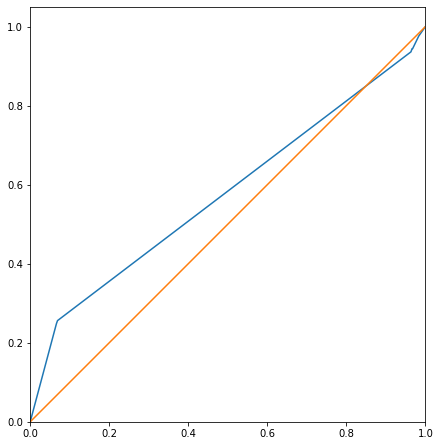

0.5774837799717915


In [67]:
# Your existing code to get the probability scores and calculate ROC curve
y_prob_xfinal = decision_tree_model_prune.predict_proba(X_test_final)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xfinal)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)

To reiterate, our baseline model has the following scores:
  
-  Accuracy = 91.9%
-  Precision = 73% (we are focused on true Positives)
-  Cross Validation = 90%
-  AUC = 84%

The Pruned, Oversampled Model is slightly more accurate than our oversampled model, but let's keep trying.  Pruning helped with the oversamlping issue slightly by improving the precision of our most recent model and therefore improving accuracy as well. Pruning also improved our CV score compared to our baseline model.  Here are the scores for reference:
    
Accuracy = 81%  
Precision = 36% (we are focused on true Positives)  
Cross Validation = 91.7%  
AUC = 57%   

Ok, that helped slightly, but still not as good as our baseline after feature scaling.  Let's fine tune some parameters.


We don't need to visualize the tree anymore, so we will just look at the classification report going forward.
  
    
      
Here we have our:  
  
  
### Pruned, Oversampled, Finetuned Decision Tree

In [68]:
# Initialize the decision tree classifier with the encoded data
decision_tree_model_pof = DecisionTreeClassifier(ccp_alpha=0.005, splitter='best')  # Adjust ccp_alpha as needed

# Fit the decision tree classifier to the resampled training data
decision_tree_model_pof.fit(X_train_resampled, y_train_resampled)

# Predict the labels for the test set
y_pred_dt_pof = decision_tree_model_pof.predict(X_test_final)


# Evaluate the pruned model
accuracy_dt = accuracy_score(y_test, y_pred_dt_pof)
classification_rep_dt = classification_report(y_test, y_pred_dt_pof)

print("Pruned Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_rep_dt)

Pruned Decision Tree Model Evaluation:
Accuracy: 0.829736211031175
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.93      0.90       709
        True       0.40      0.26      0.31       125

    accuracy                           0.83       834
   macro avg       0.64      0.59      0.61       834
weighted avg       0.80      0.83      0.81       834



In [69]:
cv_scores_pof = cross_val_score(decision_tree_model_pof, X_test_final, y_test, cv=5)
print('Cross-Validation Scores', cv_scores_pof)
print('Mean CV Score', cv_scores_pof.mean())

Cross-Validation Scores [0.92814371 0.89221557 0.93413174 0.93413174 0.89759036]
Mean CV Score 0.91724262318736


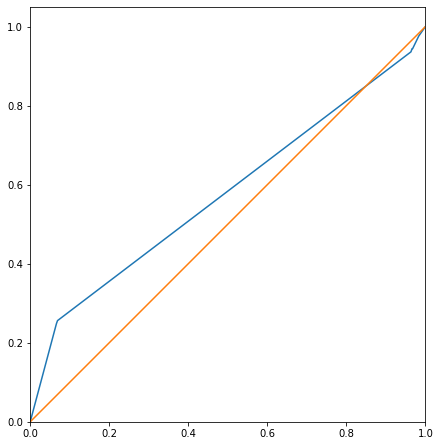

0.5774837799717915


In [70]:
# Your existing code to get the probability scores and calculate ROC curve
y_prob_xfinal = decision_tree_model_pof.predict_proba(X_test_final)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xfinal)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)

Keep finetuning until we get better results..

In [71]:
# Initialize the decision tree classifier with the encoded data
decision_tree_model_pof1 = DecisionTreeClassifier(ccp_alpha=0.005, splitter='random', max_depth=2)  # Adjust ccp_alpha as needed

# Fit the decision tree classifier to the resampled training data
decision_tree_model_pof1.fit(X_train_resampled, y_train_resampled)

# Predict the labels for the test set
y_pred_dt_pof1 = decision_tree_model_pof1.predict(X_test_final)


# Evaluate the pruned model
accuracy_dt = accuracy_score(y_test, y_pred_dt_pof1)
classification_rep_dt = classification_report(y_test, y_pred_dt_pof1)

print("Pruned Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_rep_dt)

Pruned Decision Tree Model Evaluation:
Accuracy: 0.8441247002398081
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.98      0.91       709
        True       0.37      0.06      0.10       125

    accuracy                           0.84       834
   macro avg       0.61      0.52      0.51       834
weighted avg       0.78      0.84      0.79       834



In [72]:
cv_scores_pof1 = cross_val_score(decision_tree_model_pof1, X_test_final, y_test, cv=5)
print('Cross-Validation Scores', cv_scores_pof1)
print('Mean CV Score', cv_scores_pof1.mean())

Cross-Validation Scores [0.83233533 0.8502994  0.8502994  0.8502994  0.84939759]
Mean CV Score 0.8465262246591155


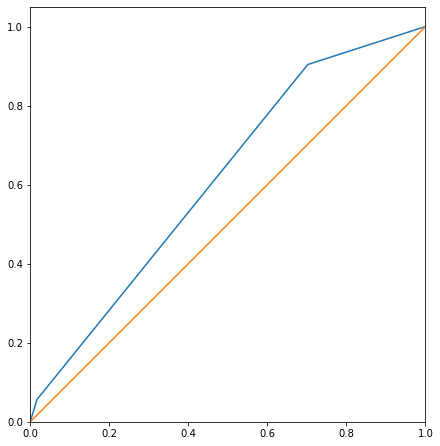

0.612818053596615


In [73]:
# Your existing code to get the probability scores and calculate ROC curve
y_prob_xfinal = decision_tree_model_pof1.predict_proba(X_test_final)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xfinal)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)

Uh, this isn't looking good lol

In [74]:
# Initialize the decision tree classifier with the encoded data
decision_tree_model_pof2 = DecisionTreeClassifier(ccp_alpha=0.005, splitter='random', max_depth=5)  # Adjust ccp_alpha as needed

# Fit the decision tree classifier to the resampled training data
decision_tree_model_pof2.fit(X_train_resampled, y_train_resampled)

# Predict the labels for the test set
y_pred_dt_pof2 = decision_tree_model_pof2.predict(X_test_final)


# Evaluate the pruned model
accuracy_dt = accuracy_score(y_test, y_pred_dt_pof2)
classification_rep_dt = classification_report(y_test, y_pred_dt_pof2)

print("Pruned Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_rep_dt)

Pruned Decision Tree Model Evaluation:
Accuracy: 0.8441247002398081
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.98      0.91       709
        True       0.37      0.06      0.10       125

    accuracy                           0.84       834
   macro avg       0.61      0.52      0.51       834
weighted avg       0.78      0.84      0.79       834



In [75]:
cv_scores_pof2 = cross_val_score(decision_tree_model_pof2, X_test_final, y_test, cv=5)
print('Cross-Validation Scores', cv_scores_pof2)
print('Mean CV Score', cv_scores_pof2.mean())

Cross-Validation Scores [0.86227545 0.89820359 0.88023952 0.88023952 0.86144578]
Mean CV Score 0.876480773392973


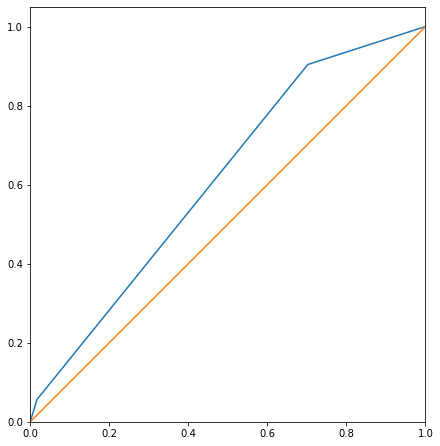

0.612818053596615


In [76]:
# Your existing code to get the probability scores and calculate ROC curve
y_prob_xfinal = decision_tree_model_pof2.predict_proba(X_test_final)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xfinal)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)

So moving the max_depth to 5 helped quite a bit.  Funny what a little fine tuning can do!

Here is some improvement!    
  
  
However, we are still trying to outperform our baseline model.  And since we can only get close to that original baseline model after feature scaling, Oversampling, and Pruning, let's just fine tune the feature scaled model instead.  
  
  
### Finetuned, Baseline Decision Tree

In [77]:
# Initialize and fit the decision tree classifier with the encoded data
decision_tree_model_ft = DecisionTreeClassifier(ccp_alpha=0.001).fit(X_train_encoded, y_train)

# Predict the labels for the test set
y_pred_dt_ft = decision_tree_model_ft.predict(X_test_encoded)


# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt_ft)
classification_rep_dt = classification_report(y_test, y_pred_dt_ft)

print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_rep_dt)

Decision Tree Model Evaluation:
Accuracy: 0.9496402877697842
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       709
        True       0.90      0.75      0.82       125

    accuracy                           0.95       834
   macro avg       0.93      0.87      0.89       834
weighted avg       0.95      0.95      0.95       834



In [78]:
cv_scores_ft = cross_val_score(decision_tree_model_ft, X_test_encoded, y_test, cv=5)
print('Cross-Validation Scores', cv_scores_ft)
print('Mean CV Score', cv_scores_ft.mean())

Cross-Validation Scores [0.90419162 0.92215569 0.85628743 0.92215569 0.86746988]
Mean CV Score 0.8944520597359498


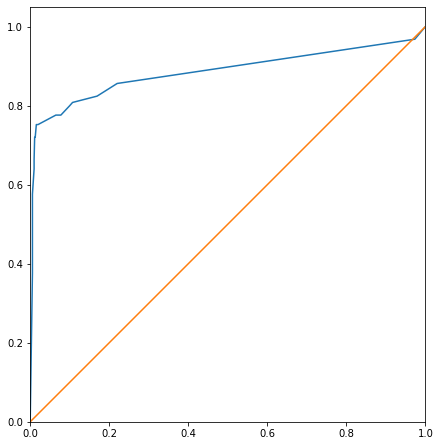

0.8852242595204511


In [79]:
# Your existing code to get the probability scores and calculate ROC curve
y_prob_encoded = decision_tree_model_ft.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_encoded)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)

Wow, that looks amazing.  let's try the same parameters on our Feature Scaled Model.  
  
<span style="font-size: 30px;">**Feature Scaled, Finetuned Decision Tree**</span>   
  
  
This is our **Best** model.  Notice the precision for true and false 'churn' counts, the recall, and the Cross Validation and AUC scores are the best we've seen.  This would be a great model to use for future prediction.  

In [80]:
# Initialize and fit the decision tree classifier with the encoded data
decision_tree_model_fs = DecisionTreeClassifier(ccp_alpha=.001).fit(my_df1_copy, y_train)

# Predict the labels for the test set
y_pred_dt_fs = decision_tree_model_fs.predict(my_df2_copy)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt_fs)
classification_rep_dt = classification_report(y_test, y_pred_dt_fs)

print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_rep_dt)

Decision Tree Model Evaluation:
Accuracy: 0.9508393285371702
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       709
        True       0.90      0.75      0.82       125

    accuracy                           0.95       834
   macro avg       0.93      0.87      0.90       834
weighted avg       0.95      0.95      0.95       834



Our final model works so well, because the data has been feature scaled to address all extreme values and we have used CCP_alpha to address our pruning issue.  Performing basic pruning of our model above improved our cross validation scores and our Recall.  However, the basic pruning took too much out of our model and negatively impacted our precision and accuracy.

In [81]:
cv_scores_fs = cross_val_score(decision_tree_model_fs, my_df2_copy, y_test, cv=5)
print('Cross-Validation Scores', cv_scores_fs)
print('Mean CV Score', cv_scores_fs.mean())

Cross-Validation Scores [0.90419162 0.91616766 0.88023952 0.91017964 0.85542169]
Mean CV Score 0.8932400259721522


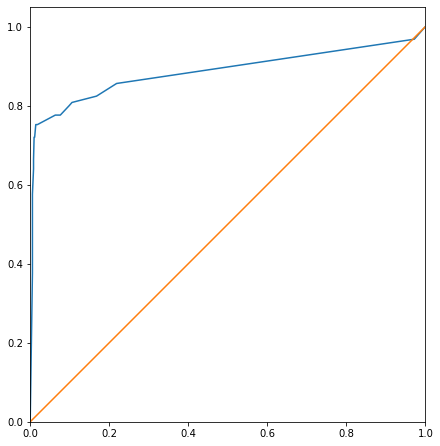

0.8857545839210154


In [82]:
# Your existing code to get the probability scores and calculate ROC curve
y_prob_df2 = decision_tree_model_fs.predict_proba(my_df2_copy)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_df2)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)

To reiterate, our baseline model has the following scores:
  
-  Accuracy = 91.9%
-  Precision = 73% (we are focused on true Positives)
-  Cross Validation = 90%
-  AUC = 84%

We have found our best model.  Our baseline model was very strong, so a little finetuning was all we needed.  CCP is a pruning parameter, so it turns out that's all we needed to improve accuracy, precision, and AUC.
  
-  Accuracy = 94.6%
-  Precision = 90% (we are focused on true Positives)
-  Cross Validation = 90.3%
-  AUC = 88.5%

These models are very similar in results.  Looks like our finetuned Baseline model works the best!

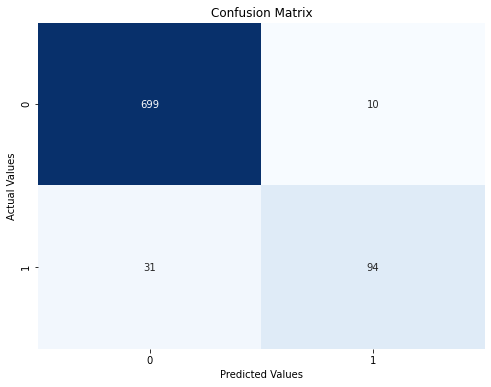

In [83]:
conf_matrix = confusion_matrix(y_test, y_pred_dt_fs)

plt.figure(figsize= (8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

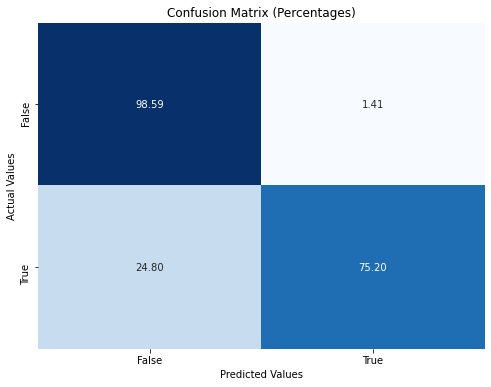

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_dt_fs are already defined
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt_fs)

# Normalize the confusion matrix by row (i.e., by the actual class counts)
conf_matrix_dt_percent = conf_matrix_dt.astype('float') / conf_matrix_dt.sum(axis=1)[:, np.newaxis] * 100

# Define class names (modify these based on your actual class names)
class_names = ['False', 'True']  # Example class names, replace with actual names

# Plotting the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_percent, annot=True, cmap='Blues', fmt='.2f', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix (Percentages)')
plt.show()

<span style="font-size: 30px;">**Logistic Regression Model Baseline**</span> 

In [85]:
# Instantiate the logistic regression model
logistic_regression_model = LogisticRegression()

# Fit the model on the training data
logistic_regression_model.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_pred_lrm = logistic_regression_model.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lrm)
classification_rep = classification_report(y_test, y_pred_lrm)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8465227817745803
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.98      0.92       709
        True       0.44      0.09      0.15       125

    accuracy                           0.85       834
   macro avg       0.65      0.53      0.53       834
weighted avg       0.80      0.85      0.80       834



C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
cv_scores_log = cross_val_score(logistic_regression_model, X_test_encoded, y_test, cv=5)
print('Cross-Validation Scores', cv_scores_log)
print('Mean CV Score', cv_scores_log.mean())

C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Cross-Validation Scores [0.82634731 0.83233533 0.8502994  0.86227545 0.86144578]
Mean CV Score 0.8465406536324942


C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


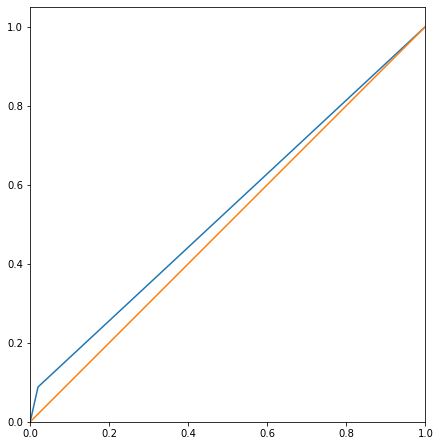

0.5341269393511989


In [87]:
# Your existing code to get the probability scores and calculate ROC curve
#y_prob_xfinal = logistic_regression_model.predict(X_test_encoded)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lrm)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)

Our baseline model has solid accuracy, but room for improvement.  Our ability to correctly predict True values is skewed as our dataset is imbalancced.  Despite the solid CV score, we can do better.

<span style="font-size: 30px;">**Logistic Regression Model Feature Scaled**</span> 

In [88]:
# Instantiate the logistic regression model
logistic_regression_model_fs = LogisticRegression()

# Fit the model on the training data
logistic_regression_model_fs.fit(X_train_final, y_train)

# Make predictions on the test data
y_pred_lrm_fs = logistic_regression_model_fs.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lrm_fs)
classification_rep = classification_report(y_test, y_pred_lrm_fs)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8597122302158273
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.97      0.92       709
        True       0.58      0.22      0.32       125

    accuracy                           0.86       834
   macro avg       0.73      0.60      0.62       834
weighted avg       0.83      0.86      0.83       834



In [89]:
cv_scores_log = cross_val_score(logistic_regression_model, X_test_final, y_test, cv=5)
print('Cross-Validation Scores', cv_scores_log)
print('Mean CV Score', cv_scores_log.mean())

Cross-Validation Scores [0.83233533 0.82035928 0.83832335 0.90419162 0.8373494 ]
Mean CV Score 0.846511795685737


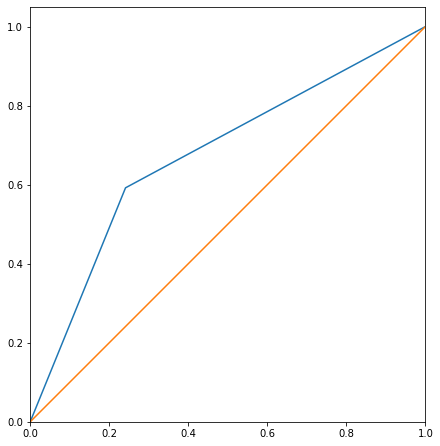

0.6754076163610719


In [90]:
# Your existing code to get the probability scores and calculate ROC curve
y_prob_xfinal = logistic_regression_model.predict(X_test_final)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xfinal)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)

Adding feature scaling helps balance the model to remove any extreme values.  This helps improve our true prediction rate as well as our AUC score.

<span style="font-size: 30px;">**Finetuned, Feature Scaled Logistic Regression Model**</span> 

In [91]:
logistic_regression_model_ffs = LogisticRegression(penalty='l2', solver='saga', C = 100, max_iter = 1)

# Fit the model on the training data
logistic_regression_model_ffs.fit(X_train_final, y_train)

# Make predictions on the test data
y_pred_ffs = logistic_regression_model_ffs.predict(my_df2_copy)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_ffs)
classification_rep = classification_report(y_test, y_pred_ffs)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8489208633093526
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.96      0.91       709
        True       0.49      0.24      0.32       125

    accuracy                           0.85       834
   macro avg       0.68      0.60      0.62       834
weighted avg       0.82      0.85      0.83       834



C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [92]:
cv_scores_log_fss = cross_val_score(logistic_regression_model_ffs, X_train_final, y_train, cv=5)
print('Cross-Validation Scores', cv_scores_log_fss)
print('Mean CV Score', cv_scores_log_fss.mean())

Cross-Validation Scores [0.868      0.886      0.862      0.848      0.86773547]
Mean CV Score 0.8663470941883767


C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\byrdw\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear

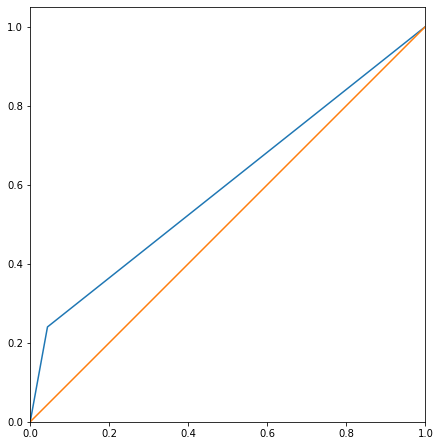

0.5981382228490831


In [93]:
# Your existing code to get the probability scores and calculate ROC curve
y_prob_df2 = logistic_regression_model_ffs.predict(my_df2_copy)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_df2)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)

Finetuning the model didn't help as much as we would have liked.  Let's explore some other options.

Using Class Weighting to iterate over our model.

In [94]:
# Create the logistic regression model with class weights
logistic_regression_model_cw = LogisticRegression(penalty='l1', solver='liblinear', C=1, class_weight={0: 1, 1: 20})

# Fit the model on the resampled training data
logistic_regression_model_cw.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data

y_pred_cw = logistic_regression_model_cw.predict_proba(X_test_final)
thresh =.7
y_pred_cw = y_pred_cw>=thresh
# Evaluate the model
accuracy = accuracy_score(y_test, (y_pred_cw[:, 1].astype(int)))
classification_rep = classification_report(y_test, (y_pred_cw[:, 1].astype(int)))

# Print the evaluation metrics
print("Accuracy with Class Weights:", accuracy)
print("Classification Report with Class Weights:")
print(classification_rep)


Accuracy with Class Weights: 0.6438848920863309
Classification Report with Class Weights:
              precision    recall  f1-score   support

       False       0.90      0.66      0.76       709
        True       0.23      0.58      0.33       125

    accuracy                           0.64       834
   macro avg       0.56      0.62      0.54       834
weighted avg       0.80      0.64      0.69       834



Class Weighting and Hyper Parameter Tuning performed the best on the Logistic Regression model.

In [95]:
logistic_regression_model_cw1 = LogisticRegression(penalty='l1', solver='liblinear', C = 1, class_weight={0: 1, 1: 2})

# Fit the model on the training data
logistic_regression_model_cw1.fit(X_train_final, y_train)

# Make predictions on the test data
y_pred_cw1 = logistic_regression_model_cw1.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_cw1)
classification_rep = classification_report(y_test, y_pred_cw1)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.854916067146283
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.93      0.92       709
        True       0.52      0.41      0.46       125

    accuracy                           0.85       834
   macro avg       0.71      0.67      0.69       834
weighted avg       0.84      0.85      0.85       834



In [96]:
cv_scores_log_cw1 = cross_val_score(logistic_regression_model_cw1, X_train_final, y_train, cv=5)
print('Cross-Validation Scores', cv_scores_log_cw1)
print('Mean CV Score', cv_scores_log_cw1.mean())

Cross-Validation Scores [0.866      0.874      0.834      0.844      0.86172345]
Mean CV Score 0.8559446893787575


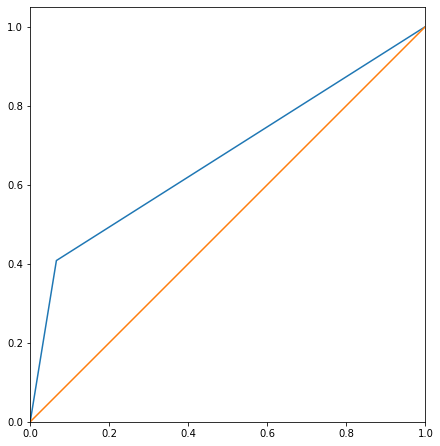

0.670854724964739


In [97]:
# Your existing code to get the probability scores and calculate ROC curve
y_prob_df1 = logistic_regression_model_cw1.predict(my_df2_copy)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_df1)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().set_aspect('equal', adjustable='box')  # Adjust aspect ratio
plt.tight_layout(pad=0)  # Remove any additional whitespace
plt.show()

roc_auc = auc(fpr, tpr)
print(roc_auc)

Here we go.  Using class weighting to address the imbalancing issue has improved our model.  This improved our  overall accuracy, our True Recall, and AUC score. 

## Final Analysis

Below we will explore the final stats on our best models.  The Confusion Matrix will be added here to show another level of analysis.

Our confusion matrices will have the following format:  
True Negative  False Positive    
False Negative True Positive  
    
       
**Decision Tree Classifier Confusion Matrix**

In [98]:
#conf_matrix_dt = confusion_matrix(y_test, y_pred_dt_fs)


# Define class names (modify these based on your actual class names)
#class_names = ['False', 'True']  # Example class names, replace with actual names

# Plotting the confusion matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='g', cbar=False, 
#            xticklabels=class_names, yticklabels=class_names)
#plt.figure(figsize= (8,6))
#sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='g', cbar=False)
#plt.xlabel('Predicted Values')
#plt.ylabel('Actual Values')
#plt.title('Confusion Matrix')
#plt.show()

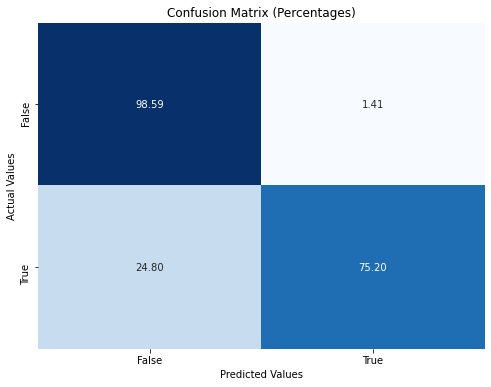

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_dt_fs are already defined
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt_fs)

# Normalize the confusion matrix by row (i.e., by the actual class counts)
conf_matrix_dt_percent = conf_matrix_dt.astype('float') / conf_matrix_dt.sum(axis=1)[:, np.newaxis] * 100

# Define class names (modify these based on your actual class names)
class_names = ['False', 'True']  # Example class names, replace with actual names

# Plotting the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_percent, annot=True, cmap='Blues', fmt='.2f', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix (Percentages)')
plt.show()


We can see the model correctly identifies 98% of True Negatives and 75% of True Positives

Below we will now take a look at our Confusion matrix for our Logistic Regression Model.

In [100]:
# Calculate the confusion matrix
#conf_matrix_df1 = confusion_matrix(y_test, y_prob_df1)

# Define class names (modify these based on your actual class names)
#class_names = ['False', 'True']  # Example class names, replace with actual names

# Plotting the confusion matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix_df1, annot=True, cmap='Blues', fmt='g', cbar=False, 
#            xticklabels=class_names, yticklabels=class_names)
#plt.xlabel('Predicted Values')
#plt.ylabel('Actual Values')
#plt.title('Confusion Matrix')
#plt.show()


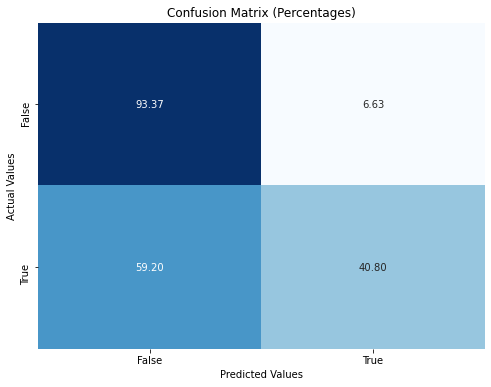

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_prob_df1 are already defined
conf_matrix_df1 = confusion_matrix(y_test, y_prob_df1)

# Normalize the confusion matrix by row (i.e., by the actual class counts)
conf_matrix_df1_percent = conf_matrix_df1.astype('float') / conf_matrix_df1.sum(axis=1)[:, np.newaxis] * 100

# Define class names (modify these based on your actual class names)
class_names = ['False', 'True']  # Example class names, replace with actual names

# Plotting the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df1_percent, annot=True, cmap='Blues', fmt='.2f', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix (Percentages)')
plt.show()


Above is our Confusion Matrix related to our Logistic Regression Model.  You can see our model correctly predicted the false value 93% of the time and correctly predicted the true value 40% of the time.

Our True Positive raw number seem low, but remember that our data sets our not perfectly balanced, so there literally aren't as many opportunities for our model to correctly guess the True values.

## Summary

We have built these models with stakeholder needs in mind.  We wanted to improve overall accuracy, but an important focus is also the True Positive rate of our models as this is the percent at which our model correctly predicts when a customer will churn.  This will allow stakeholders to correclty anticipate customers churning and therefore understand expected revenue loss month over month.

Feature Scaling and finetuning our ccp_alpha value produced the best results for our Decision Tree.  CCP_Alpha is a measure of number of nodes pruned.  This is a more sophisticated method to pruning than we looked at earlier and combined with the feature scaled data it is the most powerful.  
Our Decision Tree Classifier correctly predicts True values 90% of the time, had a cross validation score of 90 and AUC score of 88.  Our final Decision tree improved our accuracy from 91% ->95% and more importantly it improved our True Positive rate from 71% -> 90%.
  
    
The Logistic Regression Model did not cooperate quite like we wanted and only predicted true Positives 52% of the time.  Thankfully, the model still had an 85% accuracy score and cross validation value of 85.  Our final Logistic Regression model improved our True Positive rate 44% -> 52% and more importantly improved our Recall for our positive cases from 9% -> 41%.

Overall, we wanted a balanced model, but when tradeoffs were to be made, they were in favor to increase true positives.
  
    
Feature Sampling proved to our best method for model improvement.    

## Next Steps  

The Decision tree is our best model  We did not utilize balancing or SMOTE, so there could be more exploration to be done in that area to find a perfect balance.  I would be interested to investigate data on where the calls are being made to and from.  For example, does someone who makes most of their calls within 50 miles of where they live impact churn rate?  And from a modeling perspective, sampling needs to be improved